In [1]:
import tensorflow as tf
import numpy as np

In [2]:
tf.compat.v1.disable_eager_execution()

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
print("Shapes of Datasets")
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("Y_train : ", Y_train.shape)
print("Y_test : ", Y_test.shape)

Shapes of Datasets
X_train :  (60000, 28, 28)
X_test :  (10000, 28, 28)
Y_train :  (60000,)
Y_test :  (10000,)


In [5]:
sess = tf.compat.v1.Session()

In [6]:
y_train_oh = tf.one_hot(Y_train, depth = 10)
y_test_oh = tf.one_hot(Y_test, depth = 10)
Y_train = sess.run(y_train_oh)
Y_test = sess.run(y_test_oh)

In [7]:
print("Shapes of Datasets")
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("Y_train : ", Y_train.shape)
print("Y_test : ", Y_test.shape)

Shapes of Datasets
X_train :  (60000, 28, 28)
X_test :  (10000, 28, 28)
Y_train :  (60000, 10)
Y_test :  (10000, 10)


In [8]:
from matplotlib import pyplot as plt

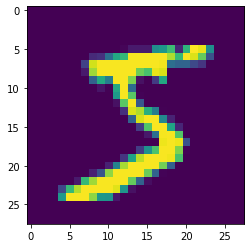

In [9]:
first_image = X_train[0]
plt.imshow(first_image)
plt.show()

In [10]:
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

### Playing around tf.random.normal

In [11]:
abc = tf.random.normal([2])
abc

<tf.Tensor 'random_normal:0' shape=(2,) dtype=float32>

In [12]:
print(sess.run(tf.random.normal([2])))

[-0.04143685 -0.21156092]


In [13]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'hid1':tf.Variable(tf.random.normal([n_input,n_hidden_1])),
    'hid2':tf.Variable(tf.random.normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random.normal([n_hidden_2,n_classes])),
}

biases = {
    'hid1':tf.Variable(tf.random.normal([n_hidden_1])),
    'hid2':tf.Variable(tf.random.normal([n_hidden_2])),
    'out':tf.Variable(tf.random.normal([n_classes])),
}

In [14]:
tf.compat.v1.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32>]

In [15]:
def forward_propogation(X, weights, biases):
    in_layer1 = tf.add(tf.matmul(X, weights['hid1']), biases['hid1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['hid2']), biases['hid2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [16]:
sess.run(tf.compat.v1.global_variables_initializer())
x = tf.compat.v1.placeholder("float", [None, n_input])
y = tf.compat.v1.placeholder(tf.int32, [None, n_classes])
pred = forward_propogation(x, weights, biases)

In [17]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels = y))

In [18]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1)
optimize = optimizer.minimize(cost)

In [19]:
c, _ = sess.run([cost,optimize], feed_dict={x:X_train , y:Y_train})
c

487033.62

In [20]:
predictions = tf.argmax(pred,1)
correct_labels = tf.argmax(y,1)
correct_predictions = tf.equal(predictions,correct_labels)
# here 1 is axis. Means along axis 1 that is find index of max element in each row

In [21]:
predictions_eval, labels, correct_pred  = sess.run([predictions, correct_labels, correct_predictions], feed_dict = {x: X_train, y: Y_train})
predictions_eval, labels, correct_pred

(array([3, 3, 3, ..., 3, 3, 3], dtype=int64),
 array([5, 0, 4, ..., 5, 6, 8], dtype=int64),
 array([False, False, False, ..., False, False, False]))

In [22]:
 correct_pred.sum()
#How many preditions are correct

6131

In [23]:
batch_size = 100
for i in range(25):
    num_batches = int(len(X_train)/batch_size)
    total_cost = 0
    i=0
    j=99
    for p in range(num_batches):
        batch_X, batch_Y = X_train[i:j], Y_train[i:j]
        i+=batch_size
        j+=batch_size
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_X , y:batch_Y})
        total_cost += c
    print(total_cost)

51517410907514.09
1380.8292689323425
1380.8273167610168
1380.827316045761
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054
1380.8273153305054


In [24]:
predictions = tf.argmax(pred,1)
correct_labels = tf.argmax(y,1)
correct_predictions = tf.equal(predictions,correct_labels)
# here 1 is axis. Means along axis 1 that is find index of max element in each row

In [25]:
predictions_eval, labels, correct_pred  = sess.run([predictions, correct_labels, correct_predictions], feed_dict = {x: X_train, y: Y_train})
predictions_eval, labels, correct_pred

(array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 array([5, 0, 4, ..., 5, 6, 8], dtype=int64),
 array([False, False, False, ..., False, False, False]))

In [26]:
 correct_pred.sum()
#How many preditions are correct

6742